In [2]:
%matplotlib inline
import sys
sys.path.insert(0,'..') # allow us to format the book

# use same formatting as rest of book so that the plots are
# consistant with that look and feel.
import book_format
book_format.set_style()

In [3]:
def update(mu1, var1, mu2, var2):
    mean = (var1*mu2 + var2*mu1) / (var1+var2)
    variance = 1 / (1/var1 + 1/var2)
    return (mean, variance)

def predict(pos, variance, movement, movement_variance):
    return (pos + movement, variance + movement_variance)

This notebook creates the animations for the Kalman Filter chapter. It is not really intended to be a readable part of the book, but of course you are free to look at the source code, and even modify it. However, if you are interested in running your own animations, I'll point you to the examples subdirectory of the book, which contains a number of python scripts that you can run and modify from an IDE or the command line. This module saves the animations to GIF files, which is quite slow and not very interactive. 

In [4]:
def plot_3d_covariance(ax, mean, cov):
    """ plots a 2x2 covariance matrix positioned at mean. mean will be plotted
    in x and y, and the probability in the z axis.

    Parameters
    ----------
    mean :  2x1 tuple-like object
        mean for x and y coordinates. For example (2.3, 7.5)

    cov : 2x2 nd.array
       the covariance matrix

    """

    # compute width and height of covariance ellipse so we can choose
    # appropriate ranges for x and y
    o,w,h = stats.covariance_ellipse(cov,3)
    # rotate width and height to x,y axis
    wx = abs(w*np.cos(o) + h*np.sin(o))*1.2
    wy = abs(h*np.cos(o) - w*np.sin(o))*1.2


    # ensure axis are of the same size so everything is plotted with the same
    # scale
    if wx > wy:
        w = wx
    else:
        w = wy

    minx = mean[0] - w
    maxx = mean[0] + w
    miny = mean[1] - w
    maxy = mean[1] + w

    xs = np.arange(minx, maxx, (maxx-minx)/40.)
    ys = np.arange(miny, maxy, (maxy-miny)/40.)
    xv, yv = np.meshgrid (xs, ys)

    zs = np.array([100.* stats.multivariate_gaussian(np.array([x,y]),mean,cov) \
                   for x,y in zip(np.ravel(xv), np.ravel(yv))])
    zv = zs.reshape(xv.shape)

    ax = plt.figure().add_subplot(111, projection='3d')
    ax.plot_surface(xv, yv, zv, rstride=1, cstride=1, cmap=cm.autumn)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.contour(xv, yv, zv, zdir='x', offset=minx-1, cmap=cm.autumn)
    ax.contour(xv, yv, zv, zdir='y', offset=maxy, cmap=cm.BuGn)


In [10]:
voltage

(25, 20.4)

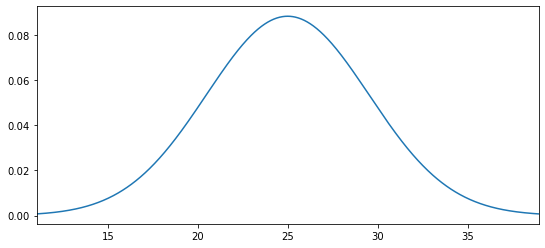

In [13]:
stats.plot_gaussian_pdf(25, 20.4);

In [48]:
ax1.plot([3,2,4])


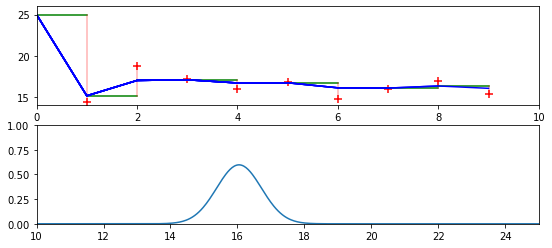

In [57]:
import matplotlib.pyplot as plt
import numpy.random as random
import math
import stats
from kf_book.gif_animate import animate

sensor_error = 1.2**2
movement_error = .2
movement = 0
voltage = (25, 20) #who knows what the first value is?

volts = [14.44, 18.74, 17.21, 15.98, 16.76, 14.8, 16.01, 16.90, 15.41, 17.31,
        16.39, 17.96]
ps = [voltage[0]]


i = 0
pred = 0
def volt_animate(frame):
    global i, ps, voltage, Z, x, pred, ax1, ax2
    
    step = frame % 4
    ax1.set_ylim([14, 26])
    ax1.set_xlim([0, 10])

    if step == 0:
        prev = voltage[0]
        voltage = predict(voltage[0], voltage[1], movement, movement_error)
        pred = voltage[0]
        ax1.plot([i, i+1], [prev, pred], c='g') 
        
    elif step == 1:
        Z = volts[i]
        i += 1 
        ax1.scatter(i, Z, marker='+', s=64, color='r')

    elif step == 2:
        ax1.plot([i,i], [pred, Z], c='r', alpha=0.3)

    else:
        voltage = update(voltage[0], voltage[1], Z, sensor_error)
        ps.append(voltage[0])
        ax1.plot(ps, c='b')
        
    ax2.cla()
    stats.plot_gaussian_pdf(voltage[0], voltage[1], xlim=[0,32], ax=ax2)
    ax2.set_xlim([10, 25])
    ax2.set_ylim([0, 1])
    #plt.tight_layout()
        
N=12
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
animate('05_volt_animate.gif', volt_animate, N*3, 350, fig);

<img src='05_volt_animate.gif'>

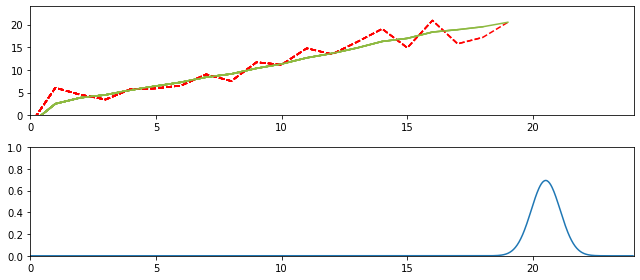

In [59]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy.random as random
import math
import stats
from kf_book.gif_animate import animate

# assume dog is always moving 1m to the right
movement = 1
movement_error = .05
sensor_error = 2.5
pos = (0, 100)   # gaussian N(0,100)

# this is the recorded output of a run of the dog sensor with an initial
# seed of 200
ZS = [-2.07, 6.05, 4.51, 3.47, 5.76, 5.93, 6.53, 9.01, 7.53, 11.68, 
      11.15, 14.76, 13.45, 16.15, 19.05, 14.87, 20.90, 15.75, 
      17.16, 20.50]
zs = []
ps = []

N=20

def dog_animate(frame):
    global pos, zs, ps,  N, ZS, ax1, ax2, fig
    pos = predict(pos[0], pos[1], movement, movement_error)    
    Z = ZS[frame]
    zs.append(Z)
    
    pos = update(pos[0], pos[1], Z, sensor_error)
    ps.append(pos[0])



    ax1.plot(zs,c='r', linestyle='dashed')
    ax1.set_xlim([0, N*1.2])
    ax1.set_ylim([0, N*1.2])

    if len(ps) > 1:
        ax1.plot(ps, c='#8EBA42')
        
    ax2.cla()
    stats.plot_gaussian_pdf(pos[0], pos[1], xlim=[0,N*1.2], ax=ax2)
    ax2.set_ylim(0, 1)
    fig.tight_layout()

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
animate('05_dog_track.gif', dog_animate, N, 200, fig=fig)

<img src='05_dog_track.gif'>